12:52:49 - cmdstanpy - INFO - Chain [1] start processing
12:52:50 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.206964    7.513679    8.914140
3266 2017-01-16  8.531958    7.809604    9.250870
3267 2017-01-17  8.319376    7.559094    9.025658
3268 2017-01-18  8.151991    7.421564    8.894426
3269 2017-01-19  8.163908    7.449796    8.864193


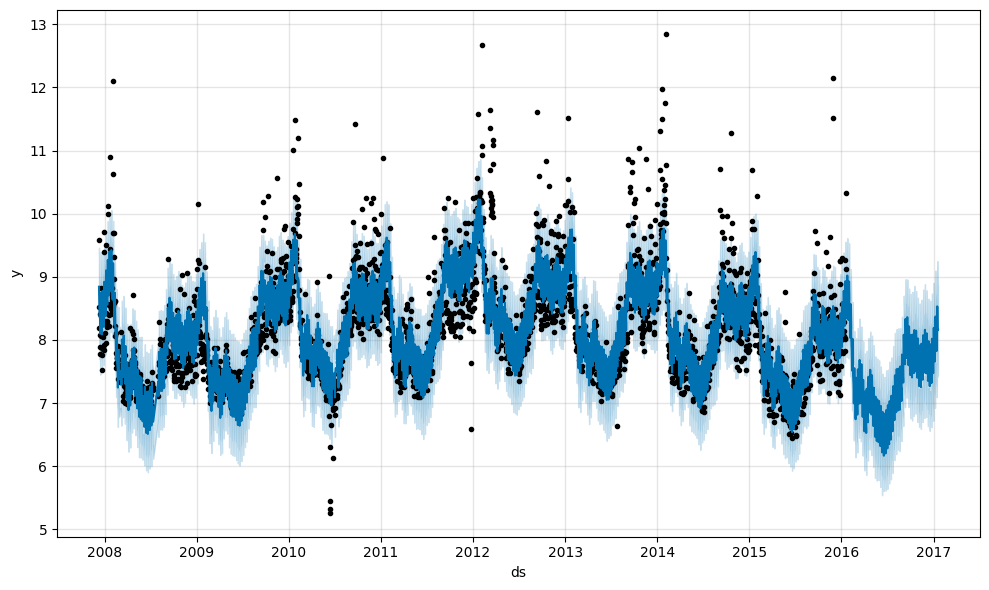

In [1]:
# 使用Prophet预测manning未来365天的页面流量
# 从2007年12月10日开始
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据集
df = pd.read_csv('./manning.csv')
#print(df.head())
#print(df.tail())
# 拟合模型
model = Prophet()
model.fit(df)

# 构建待预测日期数据框，periods = 365 代表除历史数据的日期外再往后推 365 天
future = model.make_future_dataframe(periods=365)
#print(future.tail())

# 预测数据集
forecast = model.predict(future)
#print(forecast.columns)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
model.plot(forecast)
plt.show()


In [2]:
#print(forecast)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.188899,7.513679,8.914140,6.834608,7.508284,1.018065,1.018065,1.018065,0.048297,0.048297,0.048297,0.969768,0.969768,0.969768,0.0,0.0,0.0,8.206964
3266,2017-01-16,7.187874,7.809604,9.250870,6.831624,7.509309,1.344085,1.344085,1.344085,0.352285,0.352285,0.352285,0.991800,0.991800,0.991800,0.0,0.0,0.0,8.531958
3267,2017-01-17,7.186848,7.559094,9.025658,6.829288,7.510334,1.132527,1.132527,1.132527,0.119640,0.119640,0.119640,1.012887,1.012887,1.012887,0.0,0.0,0.0,8.319376
3268,2017-01-18,7.185823,7.421564,8.894426,6.826951,7.511360,0.966167,0.966167,0.966167,-0.066661,-0.066661,-0.066661,1.032828,1.032828,1.032828,0.0,0.0,0.0,8.151991
3269,2017-01-19,7.184798,7.449796,8.864193,6.824615,7.512385,0.979109,0.979109,0.979109,-0.072268,-0.072268,-0.072268,1.051377,1.051377,1.051377,0.0,0.0,0.0,8.163908


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


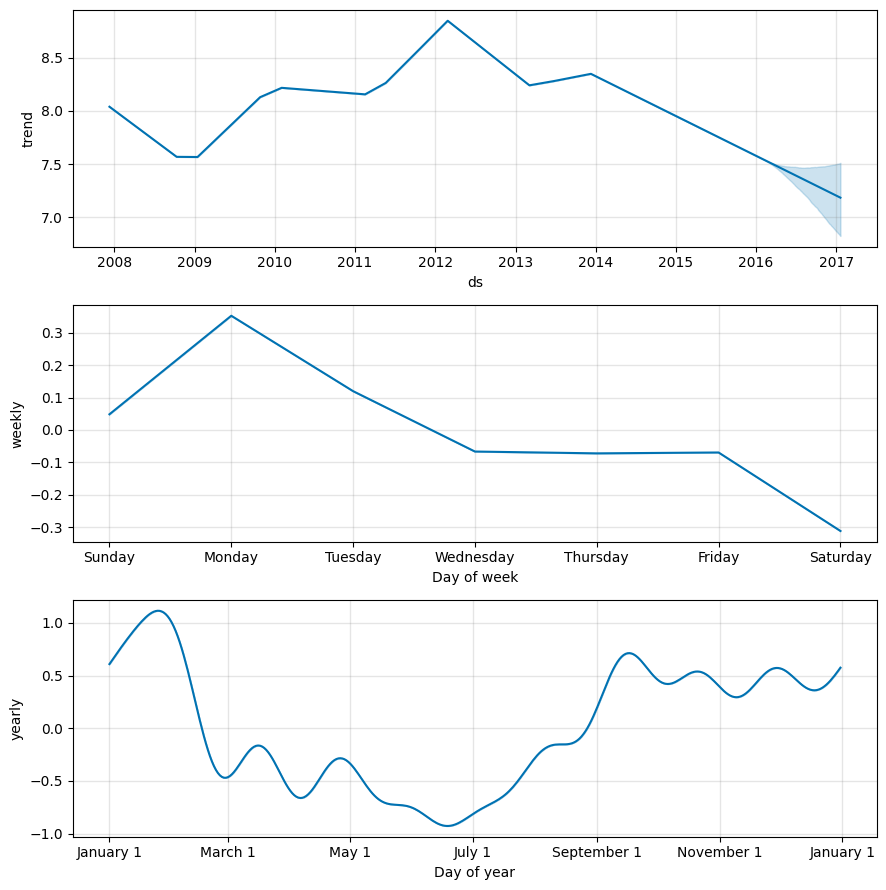

In [3]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forecast)
print(forecast.columns)


12:52:54 - cmdstanpy - INFO - Chain [1] start processing
12:52:55 - cmdstanpy - INFO - Chain [1] done processing


             ds  cap
0    2007-12-10  8.5
1    2007-12-11  8.5
2    2007-12-12  8.5
3    2007-12-13  8.5
4    2007-12-14  8.5
...         ...  ...
4726 2021-01-15  8.5
4727 2021-01-16  8.5
4728 2021-01-17  8.5
4729 2021-01-18  8.5
4730 2021-01-19  8.5

[4731 rows x 2 columns]


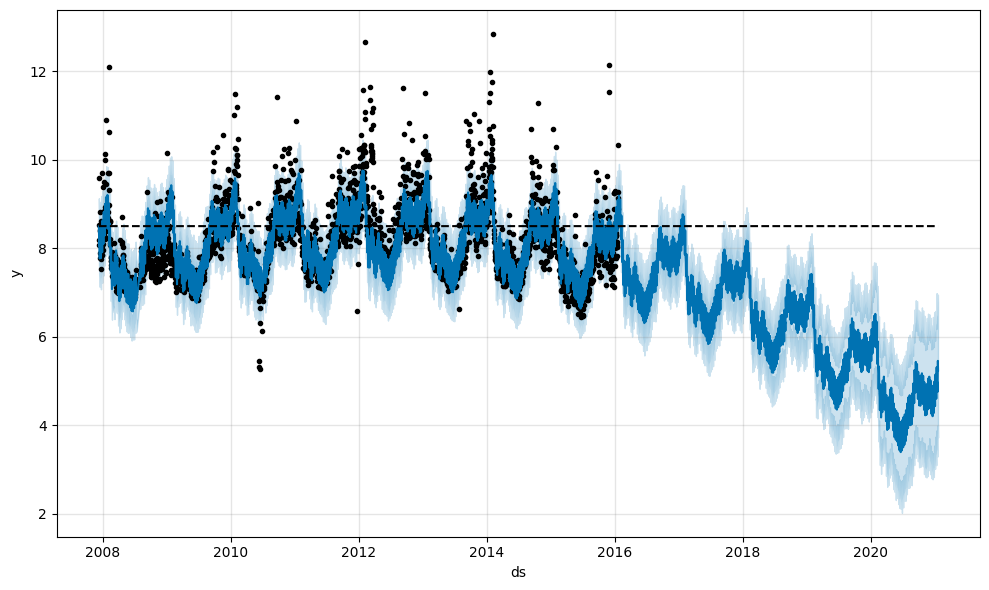

In [4]:
# 饱和增长
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)

# 预测未来 3 年的数据
future = m.make_future_dataframe(periods=1826)
# 将未来的承载能力设定得和历史数据一样
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)
print(future)

12:53:04 - cmdstanpy - INFO - Chain [1] start processing
12:53:05 - cmdstanpy - INFO - Chain [1] done processing


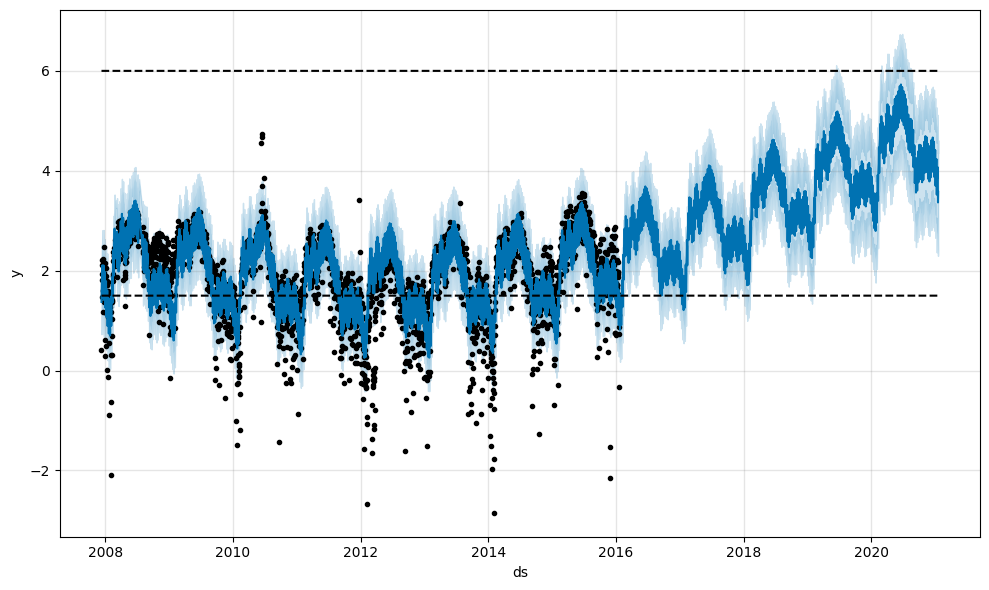

In [5]:
# 预测饱和减少
df['y'] = 10 - df['y']
df['cap'] = 6
# 设置下限
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)


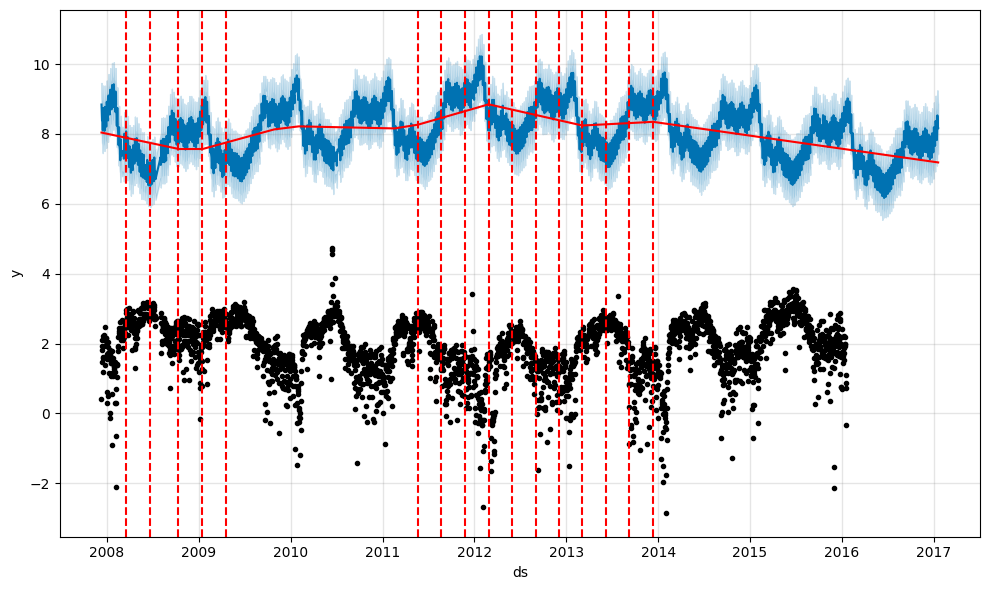

In [7]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
# plt.gca()获得当前的Axes对象ax
# 获取显著的突变点的位置
a = add_changepoints_to_plot(fig.gca(), m, forecast)
print(m)


12:53:22 - cmdstanpy - INFO - Chain [1] start processing
12:53:22 - cmdstanpy - INFO - Chain [1] done processing


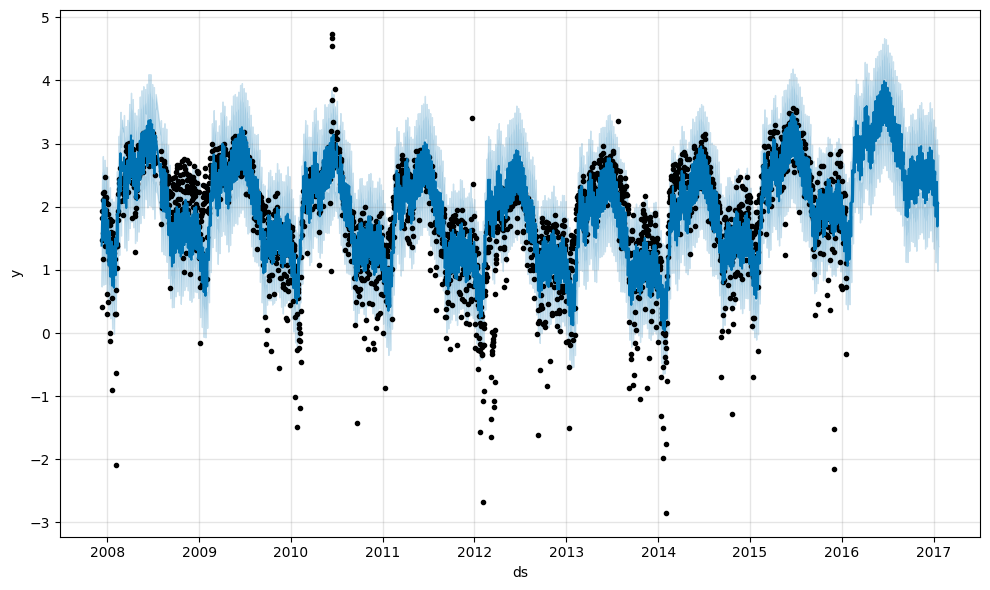

In [8]:
# 指定突变点的位置
m = Prophet(changepoints=['2014-01-01'])
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast);

In [11]:
# 对节假日建模
# 将节日看成是一个正态分布，把活动期间当做波峰，lower_window 以及upper_window 的窗口作为扩散
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#print(forecast)
# 通过 forecast 数据框，展示节假日效应
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]
# 可以使用 plot_forecast_component（从fbprophet.plot导入）来画出独立的节假日的成分

12:54:20 - cmdstanpy - INFO - Chain [1] start processing
12:54:21 - cmdstanpy - INFO - Chain [1] done processing


,ds,playoff,superbowl
2190,2014-02-02,-1.225405,-1.288795
2191,2014-02-03,-1.908312,-1.618256
2532,2015-01-11,-1.225405,0.000000
2533,2015-01-12,-1.908312,0.000000
2901,2016-01-17,-1.225405,0.000000
2902,2016-01-18,-1.908312,0.000000
2908,2016-01-24,-1.225405,0.000000
2909,2016-01-25,-1.908312,0.000000
2922,2016-02-07,-1.225405,-1.288795
2923,2016-02-08,-1.908312,-1.618256


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'holidays', 'holidays_lower', 'holidays_upper', 'playoff',
       'playoff_lower', 'playoff_upper', 'superbowl', 'superbowl_lower',
       'superbowl_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


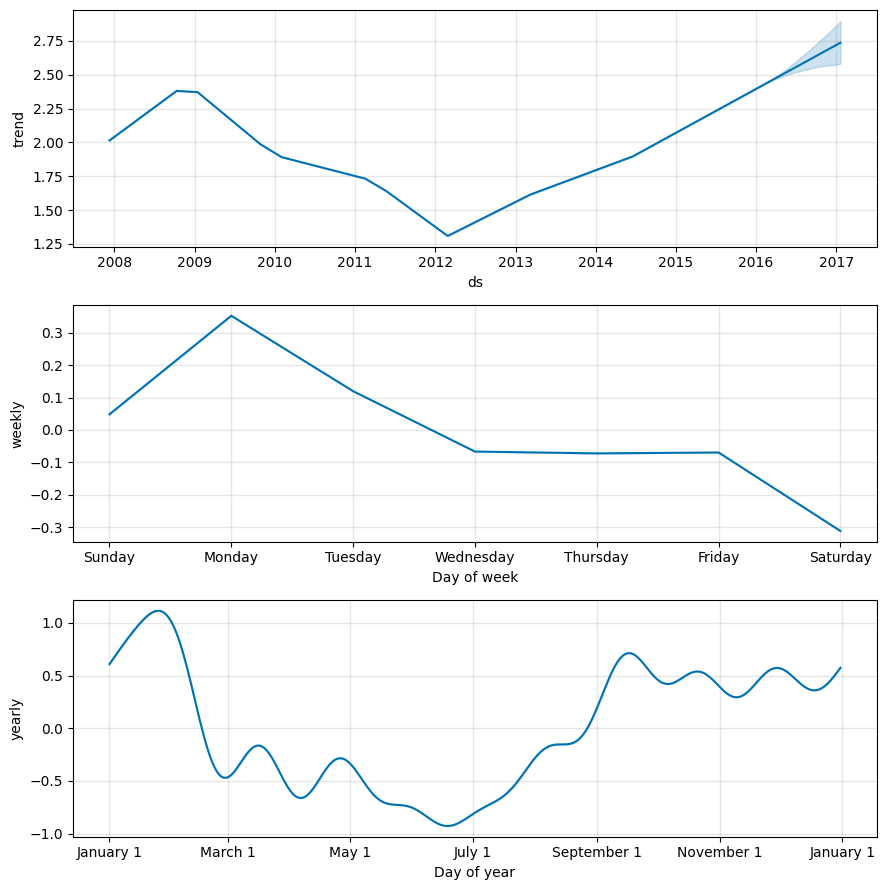

In [12]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forecast)
print(forecast.columns)
